In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sb
df1 = pd.read_csv("https://storage.googleapis.com/files.mobibootcamp.com/2021-datasets/AH_Provisional_Diabetes_Death_Counts_for_2020.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Data as of                              226 non-null    object
 1   Date_Of_Death_Year                      226 non-null    int64 
 2   Date_Of_Death_Month                     226 non-null    int64 
 3   AgeGroup                                225 non-null    object
 4   Sex                                     226 non-null    object
 5   COVID19                                 226 non-null    int64 
 6   Diabetes.uc                             226 non-null    int64 
 7   Diabetes.mc                             226 non-null    int64 
 8   C19PlusDiabetes                         226 non-null    int64 
 9   C19PlusHypertensiveDiseases             226 non-null    int64 
 10  C19PlusMajorCardiovascularDiseases      226 non-null    int64 
 11  C19Plu

In [ ]:
df1.describe()
df1.head(30)

,Data as of,Date_Of_Death_Year,Date_Of_Death_Month,AgeGroup,Sex,COVID19,Diabetes.uc,Diabetes.mc,C19PlusDiabetes,C19PlusHypertensiveDiseases,C19PlusMajorCardiovascularDiseases,C19PlusHypertensiveDiseasesAndMCVD,C19PlusChronicLowerRespiratoryDisease,C19PlusKidneyDisease,C19PlusChronicLiverDiseaseAndCirrhosis,C19PlusObesity
0,10/20/2020,2020,1,<18 years,Female (F),0,3,5,0,0,0,0,0,0,0,0
1,10/20/2020,2020,1,<18 years,Male (M),0,3,3,0,0,0,0,0,0,0,0
2,10/20/2020,2020,1,18-29 years,Female (F),0,20,36,0,0,0,0,0,0,0,0
3,10/20/2020,2020,1,18-29 years,Male (M),0,44,65,0,0,0,0,0,0,0,0
4,10/20/2020,2020,1,30-39 years,Female (F),0,53,104,0,0,0,0,0,0,0,0
5,10/20/2020,2020,1,30-39 years,Male (M),0,79,161,0,0,0,0,0,0,0,0
6,10/20/2020,2020,1,40-49 years,Female (F),0,148,326,0,0,0,0,0,0,0,0
7,10/20/2020,2020,1,40-49 years,Male (M),0,261,535,0,0,0,0,0,0,0,0
8,10/20/2020,2020,1,50-59 years,Female (F),1,365,969,0,0,0,0,0,0,0,1
9,10/20/2020,2020,1,50-59 years,Male (M),0,620,1669,0,0,0,0,0,0,0,0


In [ ]:
print(df1.shape)
print(type(df1))

In [ ]:
print(df1.duplicated())  # Find duplicated rows

In [ ]:
df1.columns = df1.columns.str.lower()  # makes columns labels as a lower case

In [ ]:
df1.columns = df1.columns.str.replace(' ', '_')  # replace ' ' in columns names to '_'
df1.columns = df1.columns.str.replace('.', '_')

In [ ]:
df1 = df1.rename(columns = {'data_as_of':'date', 'date_of_death_year' : 'death_year', 'date_of_death_month' : 'death_month',
                            'c19plusdiabetes' : 'c19_diabates', 'c19plushypertensivediseases' : 'c19_hypertensive', 'c19plusmajorcardiovasculardiseases' :
                            'c19_cardio_vascular', 'c19plushypertensivediseasesandmcvd' : 'c19_hypertensive_mcvd', 'c19pluschroniclowerrespiratorydisease' :
                            'c19_lower_respiratory', 'c19pluskidneydisease' : 'c19_kidney' , 
                            'c19pluschronicliverdiseaseandcirrhosis' : 'c19_liver_cirrhosis' 
                            ,'c19plusobesity' : 'c19_obesity'})  # rename each label
                            
df1.head(1)              

In [ ]:
import re
df1.columns = pd.Series(df1.columns).apply(lambda x: re.sub(r"[(|)| |,]", "_", x))

In [ ]:
df1.isnull().values.any()  # If there are NaN values, it returns True else False. 
df1[df1.isnull().any(axis=1)]
df1[df1['agegroup'].isna()]  # Get all rows with missing values in a specific column 
df1.dropna(inplace=True) # to drop all rows which have any field having a null or missing value
df1.dropna(subset=["agegroup"], inplace=True)
df1.fillna(0, inplace=True)  # to fill all missing values with a default value(default value in here is zero)

In [ ]:
#Data Cleaning - remove "death year and date #"
df1.drop(['death_year', 'date'],axis=1,inplace=True)
df1.info()

In [ ]:
# Get Unique Values:
print(df1['agegroup'].unique())  # **
print(df1['sex'].unique())
print(df1['death_month'].unique())
print(df1['c19_diabates'].unique())

In [ ]:
# to get the index and complete records of both the maximum and minimum of a column:
df1.loc[[df1.c19_diabates.idxmax(), df1.c19_diabates.idxmin()]]

In [ ]:
# Filter Values:
#df1[df1.death_month.between(1,2)]

# to filter values in a categorical column:
print(df1[df1.sex.isin(['Female (F)'])]) # [112 rows x 16 columns]
print(df1[df1.agegroup.isin(['30-39 years'])]) # [18 rows x 16 columns]
df1[~df1.agegroup.isin(['30-39 years'])]  # [207 rows × 16 columns]

In [ ]:
# Join seperate queries with logical OR/ANd operators:
df = df1[
        (df1.agegroup < '50-59years')
        & (df1.covid19 == 1)
        ]
print(df)  # [2 rows x 16 columns]


print(df1['agegroup'].unique())
total_rows = df1[
        ((df1.agegroup < '18')  | (df1.agegroup > '80'))
        & (df1.covid19 == 1)
        ].shape[0]
print(total_rows)

total_rows = df1[
        ((df1.agegroup < '18')  | (df1.agegroup > '60'))
        & (df1.c19_diabates == 1)
        ].shape[0]
print(total_rows)

In [ ]:
groups = df1.groupby(['agegroup'])  # groups rows that have the same values into summary rows
print(type(groups))
print(groups.size())  # Unknown age: 9
print(groups)
groups = df1.groupby(['death_month']) 
print(groups.size())
groups = df1.groupby(['c19_kidney']) 
print(groups.size())
groups = df1.groupby(['c19_diabates']) 
print(groups.size())
groups = df1.groupby(['agegroup', 'sex'])
print(groups.size())
groups = df1.groupby(['death_month', 'covid19'])
print(groups.size())

In [ ]:
# Segmentation : to converte a continuous numerical data to a categorical data ready for deeper analysis.
segments = [-1, 5, 7, 9]
labels = ['lower', 'low', 'high']
age_group = pd.cut(df1.death_month, segments, labels=labels)

df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Data as of                              226 non-null    object
 1   Date_Of_Death_Year                      226 non-null    int64 
 2   Date_Of_Death_Month                     226 non-null    int64 
 3   AgeGroup                                225 non-null    object
 4   Sex                                     226 non-null    object
 5   COVID19                                 226 non-null    int64 
 6   Diabetes.uc                             226 non-null    int64 
 7   Diabetes.mc                             226 non-null    int64 
 8   C19PlusDiabetes                         226 non-null    int64 
 9   C19PlusHypertensiveDiseases             226 non-null    int64 
 10  C19PlusMajorCardiovascularDiseases      226 non-null    int64 
 11  C19Plu

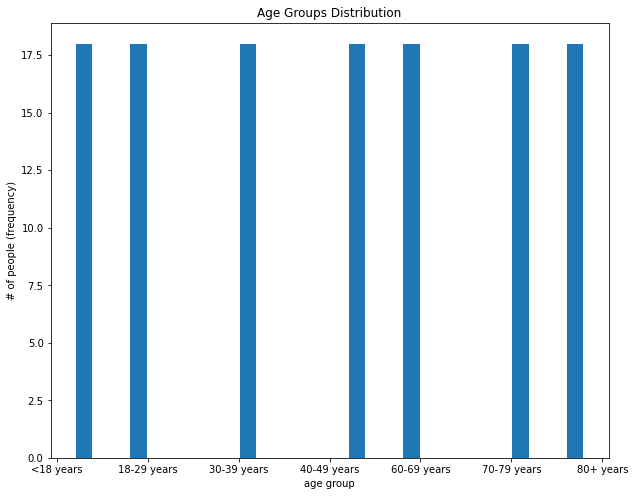

In [ ]:
# plot a histogram of agegroup labels:
# In order to work on initial dataframe(df1), call it for the second time and renames it as df2
# Set index on a Dataframe
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sb
df2 = pd.read_csv("https://storage.googleapis.com/files.mobibootcamp.com/2021-datasets/AH_Provisional_Diabetes_Death_Counts_for_2020.csv")
df2.info()
df2 = df2.rename(columns = {'data_as_of':'date', 'date_of_death_year' : 'death_year', 'date_of_death_month' : 'death_month',
                            'c19plusdiabetes' : 'c19_diabates', 'c19plushypertensivediseases' : 'c19_hypertensive', 'c19plusmajorcardiovasculardiseases' :
                            'c19_cardio_vascular', 'c19plushypertensivediseasesandmcvd' : 'c19_hypertensive_mcvd', 'c19pluschroniclowerrespiratorydisease' :
                            'c19_lower_respiratory', 'c19pluskidneydisease' : 'c19_kidney' , 
                            'c19pluschronicliverdiseaseandcirrhosis' : 'c19_liver_cirrhosis' 
                            ,'c19plusobesity' : 'c19_obesity'})  # rename each label
                            
df2.head(1)  


df2.set_index("AgeGroup", 
              inplace = True)
df2.head(5)


result = df2.loc[["<18 years", "18-29 years", "30-39 years", "40-49 years", "60-69 years", "70-79 years", "80+ years"]] # create a new dataframe
print(result)

result['new'] = 0 # add a new column wit zero values to df2 dataframe
result.head(5)
index = result.index  # how to get index of pandas dataframe
print(index)
print(type(index))
result["new"] =index  # assign index column to new column
result.head(5)


# to plot the frequency of a new column with agegroup labels:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.hist(result.new.dropna(), rwidth = 0.3)  # histogram plot syntax
plt.title('Age Groups Distribution')
plt.xlabel("age group")
plt.ylabel("# of people (frequency)")
plt.show()

In the above plot, we see the distribution of people with different age groups. Some of the age groups were not included in the above bar chart such as: 50-64/ 75-84/ older than 80. This is because these intervals had ovelap with above intervals. As we see from the above plot, all intervals have a unique distribution equals to 18.

Text(0.5, 1.0, 'Monthly Covid19 Deaths')

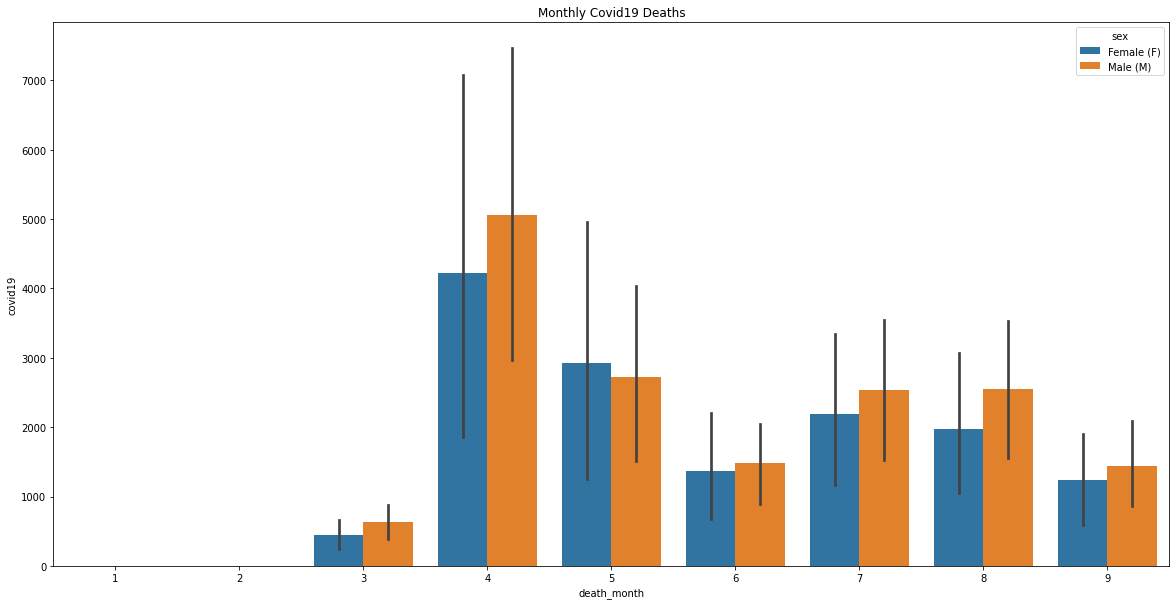

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(x="death_month", y="covid19", hue="sex", 
            data=df1).set_title("Monthly Covid19 Deaths")

We note from the chart that in all the months except May which covid19 infection was not zero, females had more covid19 cases. Their condition in each month compared to males had more numbers. Females and males in 4th month had a higher number of covid19 infection compared to other months.

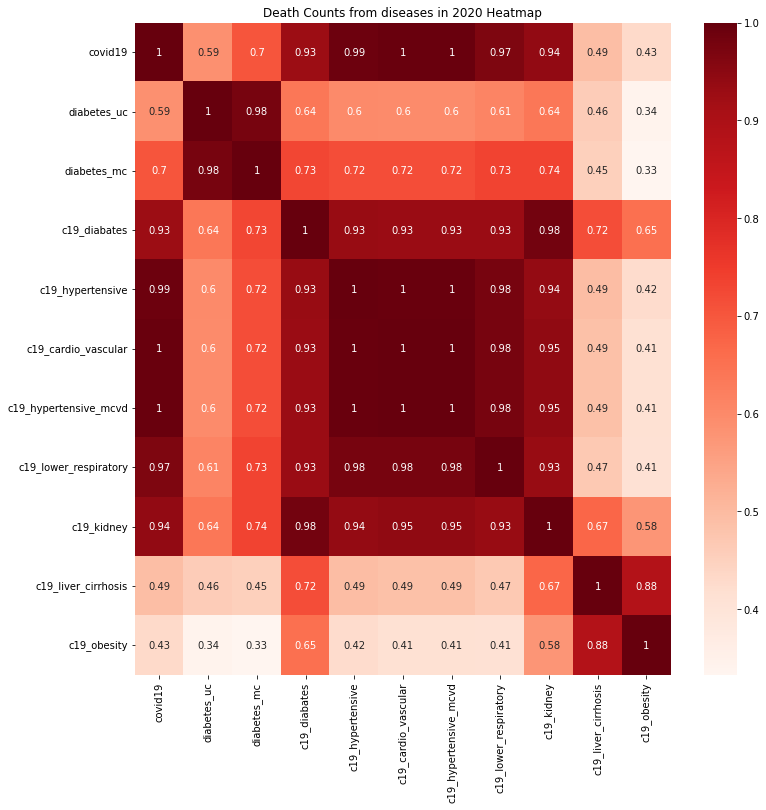

In [ ]:
#plt.figure(figsize = (15,8))
#corr = pd.DataFrame(df1).corr()
#sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 20, n=100))

# Use seaborn's heatmap to see a visualization of any correlations. Light = False, Dark = True
df2 = df1.drop(columns=["death_month"]) 
plt.figure(figsize=(12,12))
plt.title('Death Counts from diseases in 2020 Heatmap')
heatmap = sb.heatmap(df2.corr(),cmap="Reds", annot=True)

From the heat map we see that:

1)c19_obesity vs c19_liver_cirrhosis - 0.88 2)c19_obesity vs c19_diabates - 0.65 3)diabetes_uc vs diabetes_mc - 0.98 4)diabetes_uc vs c19_diabetes - 0.64 5)diabetes_mc vs c19_diabetes - 0.73 6)c19_diabetes vs c19_ . - 0.98 7)c19_diabetes vs c19_lower_respiratory - 0.93 8)c19_obesity vs c19_liver_cirrhosis - 0.88

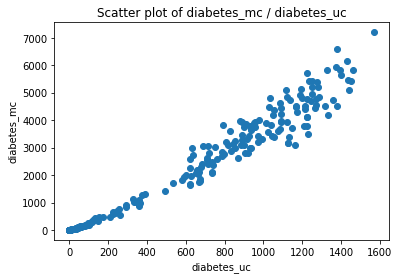

In [ ]:
plt.title('Scatter plot of diabetes_mc / diabetes_uc')
plt.ylabel("diabetes_mc")
plt.xlabel("diabetes_uc")
plt.scatter(df1.diabetes_uc, df1.diabetes_mc)

In order to show the positive correlation between diabetes_uc and diabetes_mc, I plot the scatter plot and as we see, by increasing x, y increases, too. So, they have a positive correlation.

<class 'pandas.core.series.Series'>
0       0
1       0
2       0
3       0
4       0
       ..
221    52
222    31
223    16
224    16
225     4
Name: c19_obesity, Length: 225, dtype: int64
59.0
380
0
0
73.84068274719179
282.0488888888889
1521
0


Text(0.5, 1.0, 'Scatter plot of diabetes_mc / diabetes_uc')

<Figure size 1080x576 with 0 Axes>

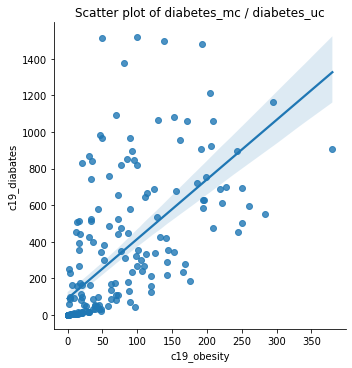

In [ ]:
import numpy as np
import seaborn as sns
a = df1["c19_obesity"]
#a = np.array([15, 35, 55])
a.ndim
a.shape
a.size
a.dtype
print(type(a))
print(a)

print(a.mean())   # Prints the mean of the array elements
print(a.max())    # Prints the max value in the array
print(a.min())    # Prints the min value in the array
print(a.argmin()) # Prints the index number of the min value
print(a.std())    # Prints the standard deviation of the array elements


b = df1["c19_diabates"]
print(b.mean())   # Prints the mean of the array elements
print(b.max()) 
print(a.min()) 

plt.figure(figsize = (15,8))
sns.lmplot(x='c19_obesity', y='c19_diabates', data=df1)
plt.title('Linear regression plot of c19_diabates / c19_obesity')

#df1.to_numpy()

We can see a correlation between c19_diabates and c19_obesity with a regression line. There is all most a positive relationnship between these two variables.

Text(0.5, 1.0, 'sex vs. c19_diabates')

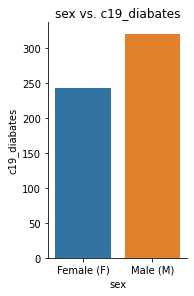

In [ ]:
sns.catplot(x="sex", y="c19_diabates",
            data=df1, kind="bar", ci=None,
            height=4, aspect=.7)
plt.title('sex vs. c19_diabates')

We can see from the above plot that whole number of males who had covid19 plus diabates are more than females who had the same diseases.

Final Result:
After taking a look at the correlations and various types of plots, there are clear relationships among many variables. 

There is a high relationship between:
covid19 and chronic lower respiratory disease
covid 19 and hypertensive disease
diabates and obesity
chronic lower respiratory disease and hypertensive diseases

As a whole, females had more deaths than males during various months except May.
The number of males who had diabates and covid19 was larger than females with similar condition.